In [1]:
#Package loading
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [2]:
#Read excel file
file_path = r'D:\Derivatives Trading\Mini Hang Seng.xlsm'
excel_file = pd.ExcelFile(file_path)

# Get the sheet you want to read
#sheet_name = 'Bright Smart'
df = pd.read_excel(excel_file, sheet_name='Bright Smart')

In [3]:
#Parameters
S=df.iloc[0, 1]
S #Hang Seng Index

# Greeks directly read from my excel modeling
Delta=df.iloc[8, 6]
print("Delta:", Delta)

Gamma_Dollar=df.iloc[10, 6]
Gamma_Dollar
print("Gamma_Dollar:", Gamma_Dollar)

Vega_Dollar=df.iloc[12, 6]
Vega_Dollar
print("Vega_Dollar:", Vega_Dollar)

Theta_Dollar_1_Day=df.iloc[11, 6]
Theta_Dollar_1_Day
print("Theta_Dollar_1_Day:",Theta_Dollar_1_Day)


Delta: -0.1708050784397448
Gamma_Dollar: 0.0
Vega_Dollar: -153.5752516259824
Theta_Dollar_1_Day: 50.179050324813076


In [4]:
#Constant for risk measurement
Delta_perc=0.01
Multiplier=10
Leveraged_Factor=2

In [5]:
#7200 HK
#CSOP Hang Seng Index Daily 2X Leveraged ETF
HSI_2X_Volume=df.iloc[3, 9]
HSI_2X_Volume

HSI_2X_Price=df.iloc[4, 9]
HSI_2X_Price
HSI_2X_Value=HSI_2X_Volume*HSI_2X_Price
HSI_2X_Delta=HSI_2X_Value*Delta_perc*Leveraged_Factor
print("HSI_2X_Delta:", HSI_2X_Delta)

#3110 HK
#Global X Hang Seng High Dividend Yield ETF
HSI_HD_Volume=df.iloc[3, 10]
HSI_HD_Volume

HSI_HD_Price=df.iloc[4, 10]
HSI_HD_Value=HSI_HD_Volume*HSI_HD_Price
HSI_HD_Delta=HSI_HD_Value*Delta_perc
print("HSI_HD_Delta:",HSI_HD_Delta)

#3037 HK
#CSOP Hang Seng Index ETF
HSI_Volume=df.iloc[3, 11]
HSI_Volume

HSI_Price=df.iloc[4, 11]
HSI_Price
HSI_Value=HSI_Volume*HSI_Price
HSI_Delta=HSI_Value*Delta_perc
print("HSI_Delta:", HSI_Delta)

#2837 HK
#Global X Hang Seng Tech ETF
HSI_Tech_Volume=df.iloc[3, 12]
HSI_Tech_Volume

HSI_Tech_Price=df.iloc[4, 12]
HSI_Tech_Price
HSI_Tech_Value=HSI_Tech_Volume*HSI_Tech_Price
HSI_Tech_Delta=HSI_Tech_Value*Delta_perc
print("HSI_Tech_Delta:",HSI_Tech_Delta)

HSI_2X_Delta: 47.264
HSI_HD_Delta: 43.72
HSI_Delta: 88.25
HSI_Tech_Delta: 20.73


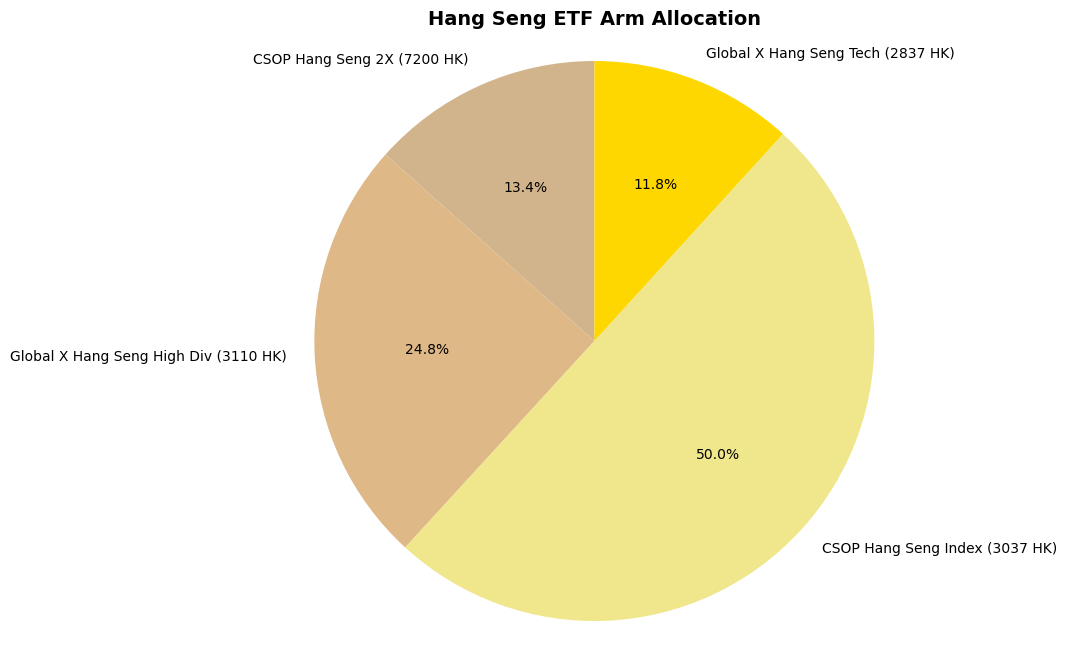

In [6]:
###############ETF Arm Only Allocation#########################
#ETF Portfolio Allocation

sheet_name_2 = 'ETF'  
df_2 = pd.read_excel(excel_file, sheet_name='ETF')

ETF=df_2["ETF"]
Shares=df_2["Shares"]
df_2['Value'] = df_2['Shares'] * df_2['Price']  

total_value = df_2['Value'].sum() 
df_2['Percentage'] = (df_2['Value'] / total_value) * 100

# Custom colors for the pie chart slices
colors = ['tan','burlywood','khaki','gold']

# Plotting the pie chart
plt.figure(figsize=(10, 8))  # Set the figure size
plt.pie(df_2['Percentage'], labels=df_2['ETF'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Hang Seng ETF Arm Allocation', fontweight='bold', fontsize=14)  # Title of the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Show the plot
plt.show()

In [7]:
#Total Delta from ETF
ETF_Total_Delta=HSI_2X_Delta+HSI_HD_Delta+HSI_Delta+HSI_Tech_Delta

#Options risk
Options_Port_Delta_Unit=Delta
print("Options_Port_Delta_Unit:",Options_Port_Delta_Unit )

Options_Port_Delta_Dollar=Delta*(S*Delta_perc)*Multiplier
print("Options_Port_Delta_Dollar:",Options_Port_Delta_Dollar )

#Combine ETF with Options
Net_Delta_Dollar=ETF_Total_Delta+Options_Port_Delta_Dollar
print("Net_Delta_Dollar:",Net_Delta_Dollar)

Unit_Dollar_Conversion=Options_Port_Delta_Dollar/Options_Port_Delta_Unit
Net_Delta_Unit=Net_Delta_Dollar/Unit_Dollar_Conversion
print("Net_Delta_Unit:", Net_Delta_Unit)

Options_Port_Delta_Unit: -0.1708050784397448
Options_Port_Delta_Dollar: -294.00678151833273
Net_Delta_Dollar: -94.04278151833273
Net_Delta_Unit: -0.05463474206607374


In [8]:
#################################Performance######################################
Capital_Input_ETF=20000
Capital_Input_Options=15000
Total_Input=Capital_Input_ETF+Capital_Input_Options

Capital_Output_ETF=19442.29
Capital_Output_Options=16267
Total_Output=Capital_Output_ETF+Capital_Output_Options

Net_PNL=Total_Output-Total_Input
print("Net_PNL:", Net_PNL)

Portfolio_Return=Net_PNL/Total_Input
print("Portfolio_Return:", Portfolio_Return)

Net_PNL: 709.2900000000009
Portfolio_Return: 0.020265428571428597


In [9]:
#########Hang Seng Index Performance###########
#Strategy Initition Date started on July 15th 2024
Benchmark_Initiation=18015 #Last price of Hang Seng Index on 15 July, 2024
Benchmark_Now= S #Last price of the last recording date
Benchmark_Return=(Benchmark_Now-Benchmark_Initiation)/Benchmark_Initiation
print("Benchmark_Return:", Benchmark_Return)

#Excess return over the benchmark (Hang Seng Index)
Excess_Return=Portfolio_Return-Benchmark_Return
print("Excess_Return:", Excess_Return)


Benchmark_Return: -0.044518456841520955
Excess_Return: 0.06478388541294955
